# ***Datos***

In [ ]:
# Nombre: Renzo Alexis Guerrero Huayta
# Curso: Introduccion al procesamiento de imagenes - SPS
# Tareas : 1,2,3,4 y 5

# ***Tarea 1***

Combinar en una imagen 6 recortes de una imagen , el programa debe funcionar con cualquier imagen que se ingrese.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xray.jpeg to xray.jpeg
Saving cafe.jpg to cafe.jpg
Saving gato_ponido.jpg to gato_ponido.jpg
Saving machupicchu.jpg to machupicchu.jpg


In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import os
import io
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import random
from PIL import Image
from scipy import ndimage, misc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir("/content/drive/My Drive/Intro_procesamiento_de_imagenes/Data")

## Dividir

In [ ]:
def f1(imagen):
  tarea = mpimg.imread(imagen)
  Dim=np.shape(tarea)

  tareaG = tarea[:,:,1]

  a_mitad_1=tarea[:,0:int(Dim[0]/2),1]
  Dim1 = np.shape(a_mitad_1)

  a_mitad_2=tarea[:,int(Dim[0]/2):,1]
  Dim2 = np.shape(a_mitad_2)

  plt.figure(1,figsize=(8,6))

  a_parte_1 = a_mitad_1[0:int(Dim1[0]/3),:]
  
  a_parte_2 = a_mitad_1[int(Dim1[0]/3):int(2*Dim1[0]/3),:]
  
  a_parte_3 = a_mitad_1[int(2*Dim1[0]/3):,:]
  
  a_parte_4 = a_mitad_2[0:int(Dim2[0]/3),:]
  
  a_parte_5 = a_mitad_2[int(Dim2[0]/3):int(2*Dim2[0]/3),:]

  a_parte_6 = a_mitad_2[int(2*Dim2[0]/3):,:]
  
  ## Imagen contenedor
  
  N = Dim[0]
  M = Dim[1]
  j1 = np.zeros((N, M), np.int64)

  # Ubicamos las partes

  j1[:a_parte_4.shape[0],:a_parte_4.shape[1]] = a_parte_4
  j1[:a_parte_4.shape[0],a_parte_4.shape[1]:a_parte_4.shape[1] + a_parte_1.shape[1]] = a_parte_1

  j1[a_parte_4.shape[0]:a_parte_4.shape[0] + a_parte_2.shape[0], :a_parte_2.shape[1] ] = a_parte_2
  j1[a_parte_4.shape[0]:a_parte_4.shape[0] + a_parte_2.shape[0], a_parte_2.shape[1]:a_parte_2.shape[1] + a_parte_5.shape[1]] = a_parte_5

  j1[a_parte_4.shape[0] + a_parte_2.shape[0]:a_parte_4.shape[0] + a_parte_2.shape[0] + a_parte_6.shape[0],:a_parte_6.shape[1]] = a_parte_6
  j1[a_parte_4.shape[0] + a_parte_2.shape[0]:a_parte_4.shape[0] + a_parte_2.shape[0] + a_parte_6.shape[0], a_parte_6.shape[1]:a_parte_6.shape[1] + a_parte_3.shape[1] ] = a_parte_3

  plt.subplot(1, 2, 1)
  plt.imshow(tareaG,cmap = 'gray')
  
  plt.subplot(1, 2, 2)
  plt.imshow(j1,cmap = 'gray')

In [ ]:
!ls

cafe.jpg       gato_ponido.jpg	keyb.tif	 sample_data
cameraman.tif  im0002.tif	machupicchu.jpg  xray.jpeg


## Resultados

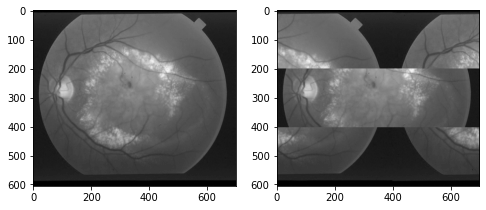

In [ ]:
f1("im0002.tif")

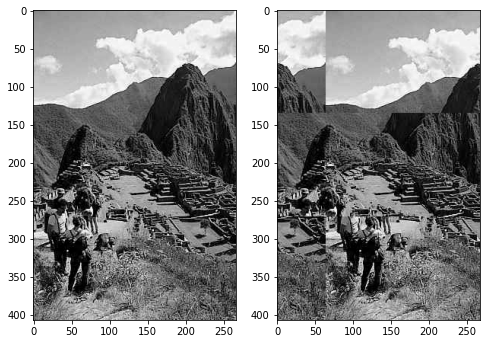

In [ ]:
f1("machupicchu.jpg")

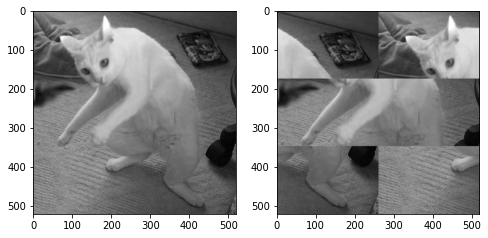

In [ ]:
f1("gato_ponido.jpg")

# ***Tarea 2***

### **Combinar y separar**

In [ ]:
global img_a
img_a = 0

def f2(x,y):
  # x-> imagen de entrada
  # y-> imagen a ocultar
  # x = np.uint8(x)
  # y = np.uint8(y)

  # Plano de bits significativos de x
  a_7 = x & 128
  a_6 = x & 64
  a_5 = x & 32
  a_4 = x & 16

  # Plano de bits no significativos de x
  _a_3 = x & 8
  _a_2 = x & 4
  _a_1 = x & 2
  _a_0 = x & 1

  # Plano de bits significativos de y
  b_7 = y & 128
  b_6 = y & 64
  b_5 = y & 32
  b_4 = y & 16

  # Plano de bits no significativos de y
  b_3 = y & 8
  b_2 = y & 4
  b_1 = y & 2
  b_0 = y & 1

  # Ponemos los bits mas significativos de y en los menos signifactivos de x
  a_3 = (b_7/128)*8 
  a_2 = (b_6/64)*4 
  a_1 = (b_5/32)*2 
  a_0 = (b_4/16)

  # Construimos la nueva imagen
  new = a_7 + a_6 + a_5 + a_4 + a_3 + a_2 + a_1 + a_0

  # Ruido de bits menos significativos
  
  img_a = _a_3 + _a_2 + _a_1 + _a_0 # imagen a 
  img_b =  b_3 + b_2 + b_1 + b_0 # imagen b

  # Convertimos a tipo unit8
  new   = np.uint8(new)
  img_a = np.uint8(img_a)
  img_b = np.uint8(img_b)
  return new,img_a,img_b

In [ ]:
def combinar(img_entrada,img_ocultar):
  a_org = mpimg.imread(img_entrada) # imagen de entrada
  c = mpimg.imread(img_ocultar) # imagen a ocultar
  dim_a = a_org.shape
  dim_c = c.shape

  if len(dim_a) == len(dim_c):
    # La imagen a ocultar debe tener el tamaño de la imagen de entrada
    b = cv2.resize(c, dsize=(dim_a[1],dim_a[0]), interpolation=cv2.INTER_CUBIC)
    new,img_a,img_b = f2(a_org,b)
    cv2.imwrite("result01.png",new)
    
    # Graficamos
    plt.figure(1,figsize=(20,12))

    plt.subplot(1,3,1)
    plt.imshow(a_org,cmap='gray')
    plt.title('Imagen de entrada')

    plt.subplot(1,3,2)
    plt.imshow(b,cmap='gray')
    plt.title('Imagen a ocultar')

    plt.subplot(1,3,3)
    plt.imshow(new,cmap='gray')
    plt.title('Imagen resultante')

  elif (len(dim_a) == 3 and len(dim_c) == 2) == True:
    # Imagen de entrada a color e imagen a ocultar en gris
    aR = mpimg.imread(img_entrada)[:,:,0] # plano rojo
    aG = mpimg.imread(img_entrada)[:,:,1] # plano verde
    aB = mpimg.imread(img_entrada)[:,:,2] # plano azul
    b = cv2.resize(c, dsize=(dim_a[1],dim_a[0]), interpolation=cv2.INTER_CUBIC)

    new,img_a,img_b = f2(aR,b)
    cv2.imwrite("result02.png",new)
    # Agregamos los demas colores, en este caso los canales G y B
    #new_total = np.stack((new,aG,aB),axis = 2)
    # Prueba 
    #prueba = np.stack((aR,aG,aB),axis = 2)

    # Graficamos
    plt.figure(1,figsize=(20,12))

    plt.subplot(1,3,1)
    plt.imshow(a_org,cmap='gray')
    plt.title('Imagen de entrada')

    plt.subplot(1,3,2)
    plt.imshow(b,cmap='gray')
    plt.title('Imagen a ocultar')

    plt.subplot(1,3,3)
    plt.imshow(new,cmap = 'gray')
    plt.title('Imagen resultante')

  elif (len(dim_a) == 2 and len(dim_c) == 3) == True:
    # Imagen de entrada(a) en gris e imagen a ocultar a color(b)
    b_org = cv2.resize(c, dsize=(dim_a[1],dim_a[0]), interpolation=cv2.INTER_CUBIC)
    b = b_org[:,:,0] # plano rojo

    new,img_a,img_b = f2(a_org,b)
    cv2.imwrite("result03.png",new)
    # Graficamos
    plt.figure(1,figsize=(20,12))

    plt.subplot(1,3,1)
    plt.imshow(a_org,cmap='gray')
    plt.title('Imagen de entrada')

    plt.subplot(1,3,2)
    plt.imshow(b_org)
    plt.title('Imagen a ocultar')

    plt.subplot(1,3,3)
    plt.imshow(new,cmap='gray')
    plt.title('Imagen resultante')
  return new,img_a,img_b

In [ ]:
def separar(img_combinada):
  x = cv2.imread(img_combinada)
  #mpimg.imread(img_combinada) # imagen de entrada
  dim_x = x.shape
  x_7 = x & 128
  x_6 = x & 64
  x_5 = x & 32
  x_4 = x & 16
  ########
  x_3 = x & 8
  x_2 = x & 4
  x_1 = x & 2
  x_0 = x & 1

  ## Ponderamos correctamente
  b_7 = x_3 * 16
  b_6 = x_2 * 16
  b_5 = x_1 * 16
  b_4 = x_0 * 16
  
  global img_a
  global img_b

  img_a = np.uint8(img_a)
  img_b = np.uint8(img_b)

  # Reconstruimos las imagenes y sumamos los planos de bits faltantes
  img1 = x_7 + x_6 + x_5 + x_4  #+ img_b
  img2 = b_7 + b_6 + b_5 + b_4  #+ img_a

  # Graficamos
  plt.figure(1,figsize=(20,12))

  plt.subplot(1,3,1)
  plt.imshow(x,cmap='gray')
  plt.title('Imagen de entrada')

  plt.subplot(1,3,2)
  plt.imshow(img1,cmap ='gray')
  plt.title('Imagen A')

  plt.subplot(1,3,3)
  plt.imshow(img2,cmap='gray')
  plt.title('Imagen B')
  return img1,img2

## **Resultados**

uint8


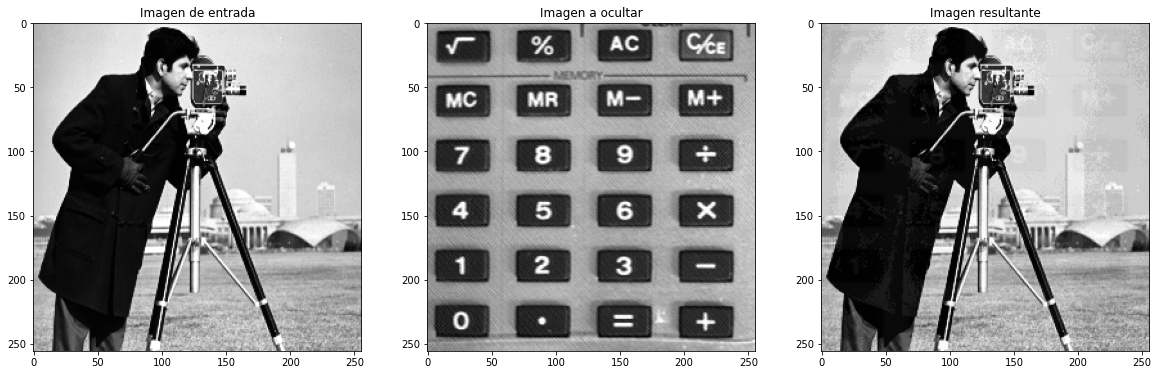

In [ ]:
# Combinar 1
nueva_imagen,img_a,img_b = combinar("cameraman.tif","keyb.tif")
print(nueva_imagen.dtype)

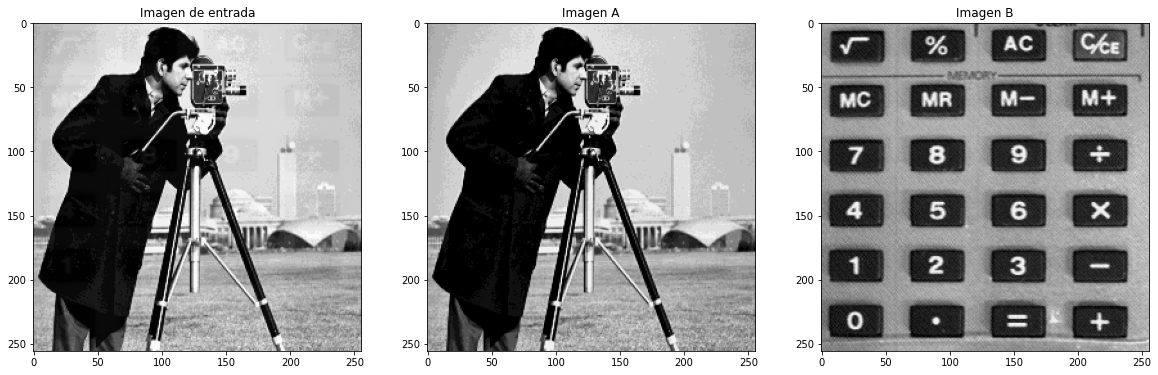

In [ ]:
# Separar 1
img_1, img_2 = separar("result01.png")

uint8


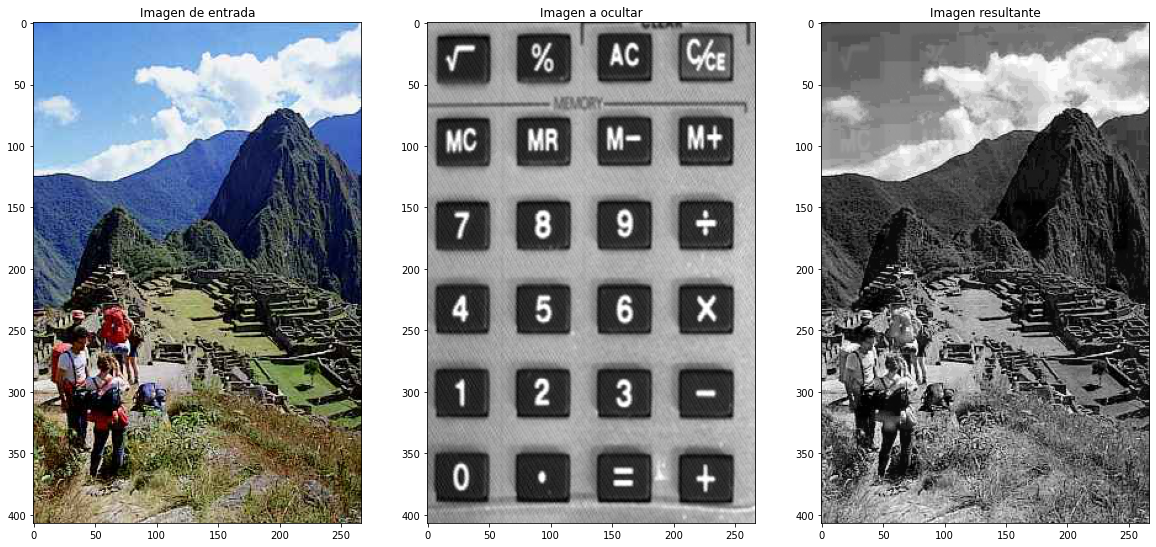

In [ ]:
# Combinar 2
nueva_imagen,img_a,img_b = combinar("machupicchu.jpg","keyb.tif")
print(nueva_imagen.dtype)

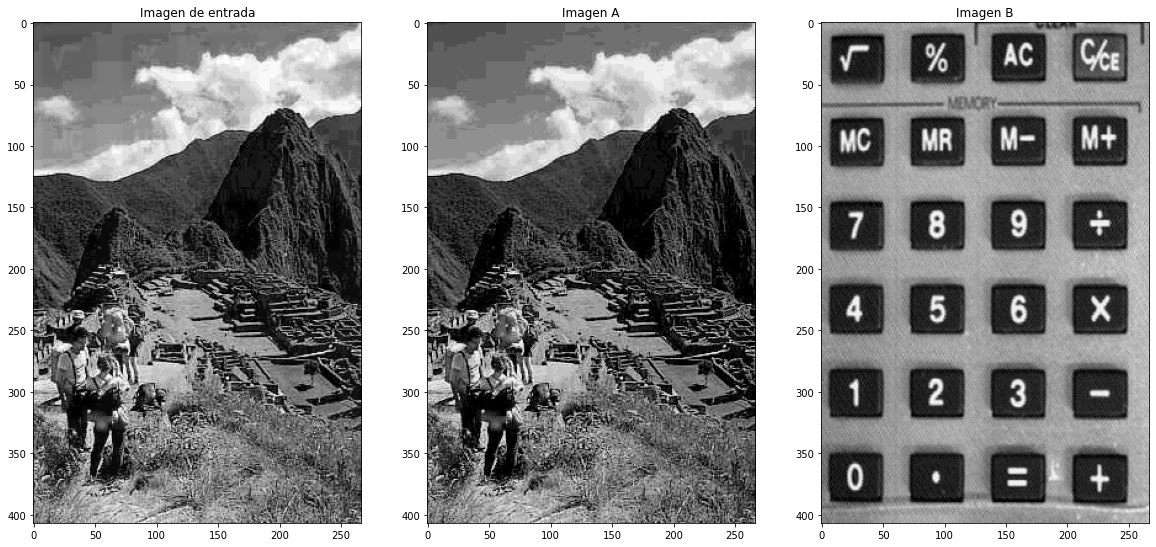

In [ ]:
# Separar 2
img_1, img_2 = separar("result02.png")

uint8


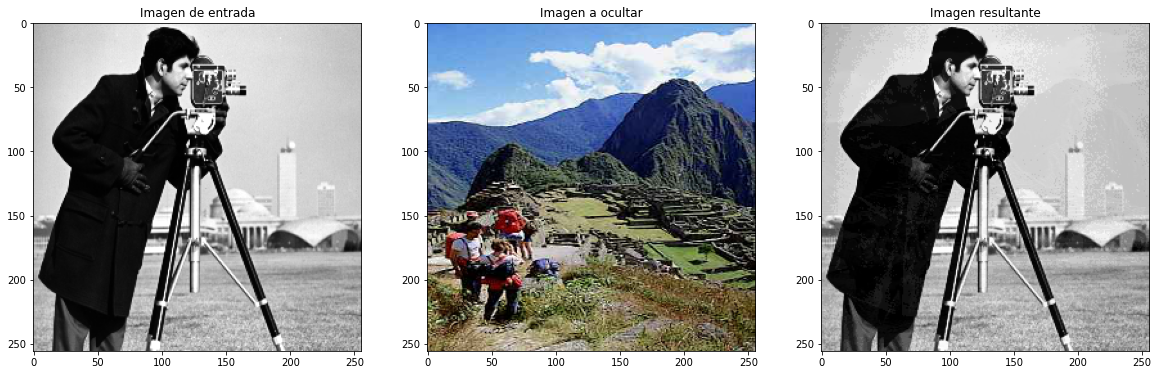

In [ ]:
# Combinar 3
nueva_imagen,img_a,img_b = combinar("cameraman.tif","machupicchu.jpg")
print(nueva_imagen.dtype)

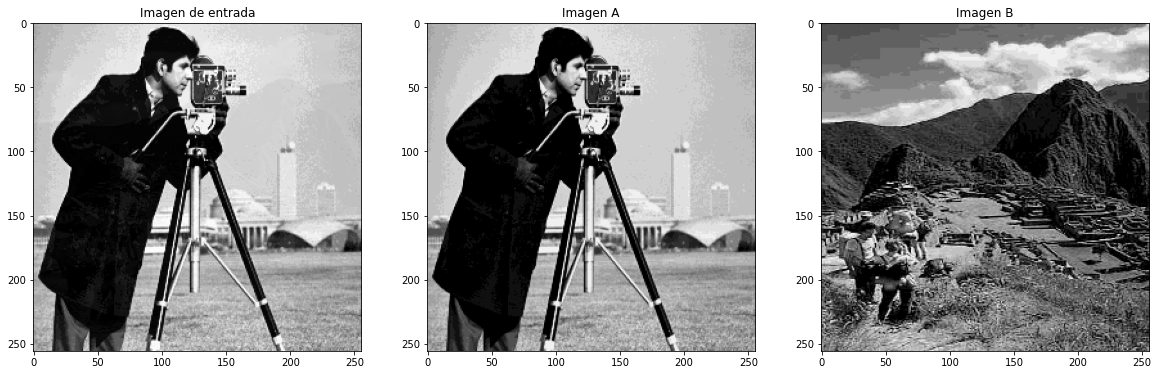

In [ ]:
#Separar 3
img_1, img_2 = separar("result03.png")

# ***Tarea 3***

Implementar un script que nos permita ver la varicion entre el uso del contraste y brillo.


*   Se debe utilizar ***interact*** , para variar el contraste y el brillo.
*   El titulo de la segunda imagen debe cambiar acorde al valor de contraste y del brillo.
* El contraste debe variar entre [ 0 , 3 ]
* El brillo debe variar entre [ 0 , 100 ]

In [ ]:
def equilibrio(img):
  dim=img.shape
  for i in range(dim[0]):
    for j in range(dim[1]):
      if (img[i][j] > 255.0 ):
        img[i][j] = 255.0
      if (img[i][j] < 0.0 ):
        img[i][j] = 0.0
  return img

In [ ]:
def BrilloContraste(contraste,brillo):
  img = mpimg.imread('im0002.tif')[:,:,1]
  img1=np.array(img,dtype=float)
  img_cont = img1 * contraste
  img_cont = equilibrio(img_cont)
  img_brill = img_cont + brillo
  img_new = equilibrio(img_brill)
  plt.figure(1,figsize=(20,20))
  plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Imagen de entrada')
  plt.subplot(122),plt.imshow(img_new,cmap='gray'),plt.title('Imagen con contraste ' + str(contraste) + ' y brillo ' + str(brillo))
  return

interact(BrilloContraste, contraste = (0,3,0.1) , brillo = (0,100,1) )

interactive(children=(FloatSlider(value=1.0, description='contraste', max=3.0), IntSlider(value=50, descriptio…

<function __main__.BrilloContraste>

# ***Tarea 4***

Implementar un script  en donde detecte la cara , se debe superponer una imagen cualquiera, la persona al moverse
delante de la cámara , la imagen que la tape tambien se debe mover con ella.

## **Accedemos a la cámara en colab**

In [26]:
def VideoCapture():
  js = Javascript('''
    async function create(){
      div = document.createElement('div');
      document.body.appendChild(div);
 
      video = document.createElement('video');
      video.setAttribute('playsinline', '');
 
      div.appendChild(video);
 
      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "environment"}});
      video.srcObject = stream;
 
      await video.play();
 
      canvas =  document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
 
      div_out = document.createElement('div');
      document.body.appendChild(div_out);
      img = document.createElement('img');
      div_out.appendChild(img);
    }
 
    async function capture(){
        return await new Promise(function(resolve, reject){
            pendingResolve = resolve;
            canvas.getContext('2d').drawImage(video, 0, 0);
            result = canvas.toDataURL('image/jpeg', 0.8);
            pendingResolve(result);
        })
    }
 
    function showimg(imgb64){ // Muestra el video
        img.src = "data:image/jpg;base64," + imgb64;
    }
 
  ''')
  display(js)
 
def byte2image(byte):
  jpeg = b64decode(byte.split(',')[1])
  im = Image.open(io.BytesIO(jpeg))
  return np.array(im)
 
def image2byte(image):
  image = Image.fromarray(image)
  buffer = io.BytesIO()
  image.save(buffer, 'jpeg')
  buffer.seek(0)
  x = b64encode(buffer.read()).decode('utf-8')
  return x

## **Detección de rostro y superposición de la imagen**

In [ ]:
def superponer(imagen):
  VideoCapture()
  eval_js('create()')
  face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  sup = mpimg.imread(imagen)
  print(img)
  while True:
    byte = eval_js('capture()')
    im = byte2image(byte)
    dim = im.shape
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    faces = face_detector.detectMultiScale(gray, 
                                           scaleFactor = 1.3, 
                                           minNeighbors = 6)
    print(faces)
    for (x, y, w, h) in faces:
      dim_aux = im[y:y+h,x:x+w].shape
      sup = cv2.resize(sup, 
                       dsize=(dim_aux[1],dim_aux[0]), 
                       interpolation=cv2.INTER_CUBIC
                       )
      im[y:y+h,x:x+w] = sup
      #cv2.rectangle(im, (x,y), (x+w,y+h), (0,255,0), 2)
    eval_js('showimg("{}")'.format(image2byte(im)))
  return 0

## **Resultados**

In [ ]:
superponer('machupicchu.jpg')

In [ ]:
superponer('cafe.jpg')

In [ ]:
superponer("gato_ponido.jpg")

In [ ]:
# https://stackoverflow.com/questions/56002672/display-an-image-over-another-image-at-a-particular-co-ordinates-in-opencv

# ***Tarea 5***

## **Detección de rostros y ojos**

In [27]:
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_detector =  cv2.CascadeClassifier('haarcascade_eye.xml')

## **Video**

In [ ]:
VideoCapture()
eval_js('create()')
while True:
  byte = eval_js('capture()')
  im = byte2image(byte)
  gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  faces = face_detector.detectMultiScale(gray, scaleFactor = 1.3,minNeighbors = 4)
  
  for (x1, y1, w1, h1) in faces:

    cv2.rectangle(im, (x1,y1), (x1+w1,y1+h1), (255,0,0), 2) # Dibujamos la cara 

    zona = im[y1:y1+h1,x1:x1+w1] # Seleccionamos la zona que contiene la cara
    zona_gray = cv2.cvtColor(zona, cv2.COLOR_RGB2GRAY) # Pasamos a escala de grises

    eyes = eye_detector.detectMultiScale(zona_gray, scaleFactor = 1.1, minNeighbors = 6)

    for (x2, y2, w2, h2) in eyes:

      cv2.rectangle(zona, (x2,y2), (x2+w2,y2+h2), (0,255,0), 2)
    
  eval_js('showimg("{}")'.format(image2byte(im)))

# ***Tarea opcional***



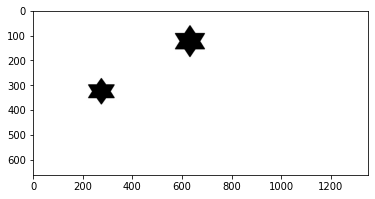

In [41]:
opcional = mpimg.imread('Tarea opcional.jpg')
plt.imshow(opcional)
plt.show()

(662, 1350, 3)


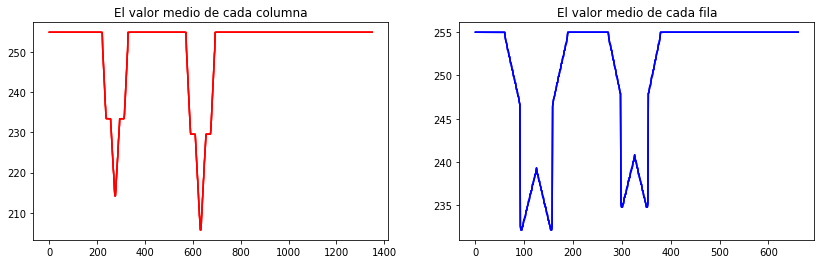

In [48]:
opcional_1 = opcional.mean(0) # Promedio de las columnas
opcional_2 = opcional.mean(1) # Promedio de las filas
print(opcional.shape)
plt.figure(1,figsize=(14,4))

plt.subplot(1, 2, 1)
plt.ylabel='intensidad'
plt.xlabel='columna'
plt.title('El valor medio de cada columna')
plt.plot(opcional_1,color='r')


plt.subplot(1, 2, 2)
plt.ylabel='intensidad'
plt.xlabel='fila'
plt.title('El valor medio de cada fila')
plt.plot(opcional_2,color='b')

plt.show()

In [49]:
 # Lista 1 almacena los indices de las columnas sobre los cuales se trazaran las lineas verticales
# Para este caso tendremos 4 lineas a dibujar
Lista1=[]
# Lista 2 almacena los indices de las filas sobre los cuales se trazaran las lineas horizontales
# Para este caso tendremos 4 lineas a dibujar
Lista2=[]
indice_col = []
indice_fil = []

def detector(imagen):
  opcional = mpimg.imread(imagen)
  opcional_1 = opcional.mean(0) # Promedio de las columnas
  opcional_2 = opcional.mean(1) # Promedio de las filas
  dim = opcional_1.shape
  dim2 = opcional_2.shape
  valor_columns = [opcional_1[i].mean() for i in range(dim[0])]
  columns_filtradas = [(indice,valor) for indice,valor in enumerate(valor_columns) if valor != 255.0]

  for i in range (len(columns_filtradas)):
    if columns_filtradas[i][0] != columns_filtradas[i-1][0] + 1 :
      if i !=0:
        Lista1.append(i-1)
      Lista1.append(i)
  Lista1.append(len(columns_filtradas)-1)

  for j in Lista1:
    indice_col.append(columns_filtradas[j][0])

  valor_filas = [opcional_2[i].mean() for i in range(dim2[0])]
  filas_filtradas = [(indice,valor) for indice,valor in enumerate(valor_filas) if valor != 255.0]

  for i in range (len(filas_filtradas)):
    if filas_filtradas[i][0] != filas_filtradas[i-1][0] + 1 :
      if i !=0:
        Lista2.append(i-1)
      Lista2.append(i)
  Lista2.append(len(filas_filtradas)-1)
  
  for j in Lista2:
    indice_fil.append(filas_filtradas[j][0])
  
  imagen_final = opcional.copy()

  # Dibujamos los rectangulos
  plt.imshow(opcional)
  for i in range(len(indice_fil)):
    plt.axhline(y = indice_fil[i])

  for k in range(len(indice_col)):
    plt.axvline(x = indice_col[k])
  """cv2.rectangle(imagen_final,
                pt1 = (indice_col[2],indice_fil[0]),
                pt2 = (indice_col[3],indice_fil[1]),
                color = (255,0,0),
                thickness = 3
                )
  cv2.rectangle(imagen_final,
                pt1 = (indice_col[1],indice_fil[2]),
                pt2 = (indice_col[0],indice_fil[3]),
                color = (255,0,0),
                thickness = 3
                )
  plt.imshow(imagen_final)"""
  return

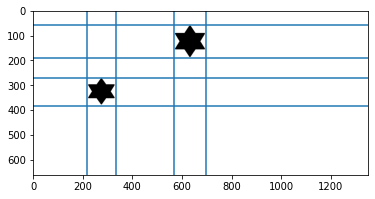

In [50]:
detector("Tarea opcional.jpg")

In [ ]:
# Formamos los pares ordenados
pares_ordenados = []
for i in indice_col:
  for j in indice_fil:
    pares_ordenados.append((i,j))
pares_ordenados

In [24]:
prim_comp = []
for k in range(len(pares_ordenados)):
  prim_comp.append(pares_ordenados[k][0])

prim_comp = set(prim_comp)
prim_comp = list(prim_comp)
prim_comp.sort(reverse=False)
prim_comp

[216, 335, 568, 695]

In [25]:
seg_comp = []
for k in range(len(pares_ordenados)):
  seg_comp.append(pares_ordenados[k][1])

seg_comp = set(seg_comp)
seg_comp = list(seg_comp)
seg_comp.sort(reverse=False)
seg_comp

[56, 191, 272, 383]

In [ ]:
# Formamos las coordenas compuestas de 4 pares ordenados  que formaran los posibles rectangulos